# PyTorch Linear Regression

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt
from util.torch import split_data
torch.__version__

'2.0.1+cu117'

## Generate Data

In [2]:
start = 1
end = 10
step = 0.3

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = 2 * X + 5

print(X.shape, y.shape)

torch.Size([30, 1]) torch.Size([30, 1])

## Define Linear Regression Model

In [3]:
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear(x)

## Split Data into Train and Test Sets

In [4]:
X_train, y_train, X_test, y_test = split_data(X, y)

## Train and Visualize the Linear Regression Model

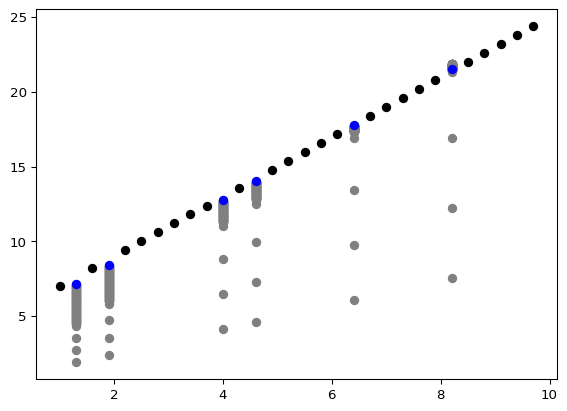

In [5]:
torch.manual_seed(42)
model = LinearRegression()

fn_loss = torch.nn.L1Loss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01)

epochs = 1000

plt.scatter(X_train, y_train, color='black')

for epoch in range(epochs):
    model.train()
    train_loss = fn_loss(model(X_train), y_train)
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        model.eval()
        with torch.inference_mode():
            test_pred = model(X_test)
            y_pred = model(X_test)
            plt.scatter(X_test, test_pred, color='gray')

with torch.inference_mode():
    plt.scatter(X_test, model(X_test), color='blue')